In [78]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [79]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [80]:
dataset = '/workspaces/2025-2-minf-0701-projeto-Leo-Chaves/src/dataset/winequality.csv'

cdata = pd.read_csv(dataset, sep=';')
cdata.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Tratamento de dados

In [81]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Divisão de dados

In [82]:
# Variáveis independentes (características)
X = cdata.drop(['quality'], axis=1)

# Variável dependente (alvo)
y = cdata['quality']

In [83]:
# Adiciona a constante
X_np = X.values

# 2. Adicione uma coluna de 1s (a constante) na primeira posição (índice 0)
X_com_constante = np.insert(X_np, 0, 1, axis=1)

# converter o resultado de volta para um DataFrame
# para manter a estrutura e os nomes das colunas
colunas = ['constante'] + list(X.columns)
X = pd.DataFrame(X_com_constante, columns=colunas)

# Veja como ficou o novo DataFrame X
X.head()

,constante,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1.0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,1.0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,1.0,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,1.0,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,1.0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [84]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

---------------------------------------------------------------------------------------------------

Não esta concluido 

In [85]:
data = pd.concat([X, y], axis=1)

# 2. Embaralhe (randomize) a ordem das linhas
data_shuffled = data.sample(frac=1, random_state=1).reset_index(drop=True)

# 3. Calcule o tamanho dos conjuntos de treino e teste
test_size = 0.3
total_rows = len(data_shuffled)
train_split = int(total_rows * (1 - test_size))

# 4. Divida os dados embaralhados
train_data = data_shuffled.iloc[:train_split]
test_data = data_shuffled.iloc[train_split:]

# 5. Separe novamente as variáveis X e y
X_train = train_data.drop('quality', axis=1)
y_train = train_data['quality']

X_test = test_data.drop('quality', axis=1)
y_test = test_data['quality']

# Verifique o tamanho de cada conjunto para confirmar
print(f"Tamanho do conjunto de treino (X_train): {len(X_train)}")
print(f"Tamanho do conjunto de teste (X_test): {len(X_test)}")


Tamanho do conjunto de treino (X_train): 1119
Tamanho do conjunto de teste (X_test): 480


In [86]:
X_train.head()

,constante,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1.0,8.8,0.41,0.64,2.2,0.093,9.0,42.0,0.99860,3.54,0.66,10.5
1,1.0,8.7,0.63,0.28,2.7,0.096,17.0,69.0,0.99734,3.26,0.63,10.2
2,1.0,10.4,0.34,0.58,3.7,0.174,6.0,16.0,0.99700,3.19,0.70,11.3
3,1.0,7.1,0.46,0.20,1.9,0.077,28.0,54.0,0.99560,3.37,0.64,10.4
4,1.0,7.1,0.39,0.12,2.1,0.065,14.0,24.0,0.99252,3.30,0.53,13.3


In [87]:
X_test.head()

,constante,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1119,1.0,6.1,0.53,0.08,1.9,0.077,24.0,45.0,0.99528,3.60,0.68,10.3
1120,1.0,6.2,0.46,0.17,1.6,0.073,7.0,11.0,0.99425,3.61,0.54,11.4
1121,1.0,8.2,0.64,0.27,2.0,0.095,5.0,77.0,0.99747,3.13,0.62,9.1
1122,1.0,7.4,0.49,0.27,2.1,0.071,14.0,25.0,0.99388,3.35,0.63,12.0
1123,1.0,9.2,0.92,0.24,2.6,0.087,12.0,93.0,0.99980,3.48,0.54,9.8


Treino de modelo Linear

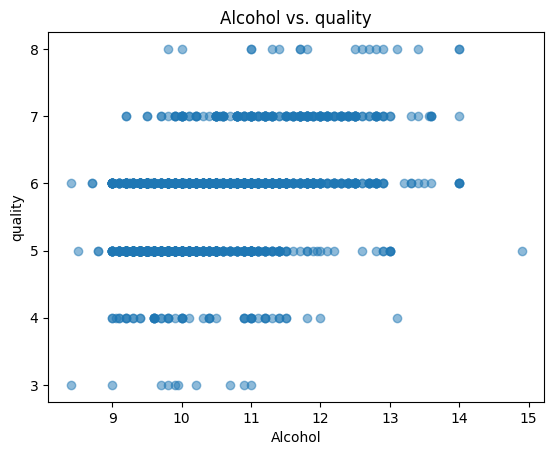

In [88]:
fig, ax = plt.subplots(1, 1)

# Plotar a relação entre 'Alcohol' e 'Life expectancy'
# Use os nomes das colunas corretos do seu DataFrame X
plt.scatter(X['alcohol'], y, alpha=0.5)

# Adicionar rótulos e título
plt.xlabel('Alcohol')
plt.ylabel('quality')
plt.title('Alcohol vs. quality')

plt.show()

In [89]:
# Importe suas classes personalizadas
from src.optimizers import SteepestDescentMethod
from src.models import LinearModel
from src.algorithms import PLA 
from src.stop_criteria import MaxIterationStopCriteria

#critério de parada
learning_rate = 0.0001  #Lambida
max_iterations = 1000  

optimizer = SteepestDescentMethod(learning_rate=learning_rate)
model = LinearModel()
algoritmo = PLA(optimizer, model)
stop_criteria = MaxIterationStopCriteria(max_iteration=max_iterations)

y_linha = y.values.reshape(-1,1) #transforma y em linha 

algoritmo.fit(X, y_linha, stop_criteria)

final_weights = algoritmo.model.w
print("Pesos Finais:", final_weights)

Pesos Finais: [[ 0.02999056]
 [ 0.02999056]
 [ 0.18756375]
 [ 0.00986374]
 [ 0.00566975]
 [ 0.03593682]
 [ 0.001972  ]
 [ 0.01126442]
 [-0.00324798]
 [ 0.02980886]
 [ 0.10216368]
 [ 0.02310783]
 [ 0.33500789]]


In [90]:
from src.algorithms import PLA
from src.models import LinearModel
from src.optimizers import SteepestDescentMethod
from src.analyzers import PlotterAlgorithmObserver
from src.stop_criteria import CompositeStopCriteria, MaxIterationStopCriteria, MinErrorStopCriteria

In [91]:
def plot_strategy(optimizer, learning_rate):
    model = LinearModel()
    alg = PLA(optimizer, model)
    min_error = 1
    max_iteration = 1000

    stop_criteria = CompositeStopCriteria()
    stop_criteria.add(MinErrorStopCriteria(min_error=min_error))
    stop_criteria.add(MaxIterationStopCriteria(max_iteration=max_iteration))

    analyzer = PlotterAlgorithmObserver()
    alg.add(analyzer)

    alg.fit(X, y_linha, stop_criteria)

    final_iteration = max(analyzer.iterations)
    print(f"Final Iteration: {final_iteration}")
    print(f"Final Error: {analyzer.errors[-1]}")
    print(f"Final Weights: {analyzer.weights[-1]}")

    final_weights_T = final_weights.reshape(-1,1)
    analyzer.plot(weights=final_weights_T)

Final Iteration: 127
Final Error: [[1.0030698]]
Final Weights: [[ 0.0216149 ]
 [ 0.0216149 ]
 [ 0.18301293]
 [ 0.01014346]
 [ 0.00601963]
 [ 0.04358722]
 [ 0.00174062]
 [ 0.05819725]
 [-0.00047726]
 [ 0.02153261]
 [ 0.07182171]
 [ 0.01460406]
 [ 0.23657009]]


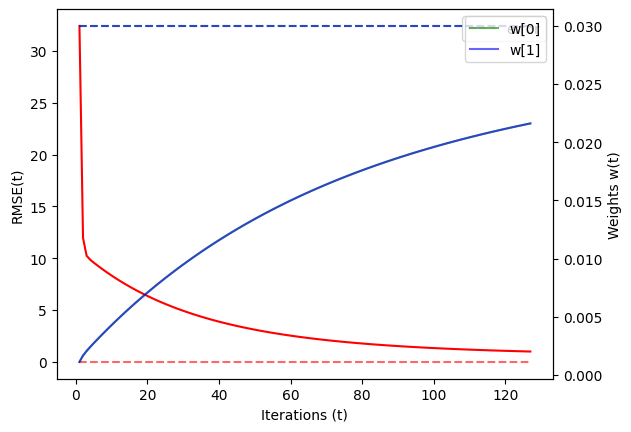

In [92]:
learning_rate = .0001
optimizer = SteepestDescentMethod(learning_rate)
plot_strategy(optimizer, learning_rate)